# Advanced Manipulation - MultiIndex, Pivoting and more

In [1]:
import pandas as pd
dfo = pd.read_csv(r'C:\Users\muham\Downloads\flights.csv', low_memory=False)
print(dfo.columns)
dfo.head()

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df = dfo.set_index(['DESTINATION_AIRPORT', 'AIRLINE'])
df = df.sort_index()
df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
10135               DL       2015     10    1            4           2582   
                    DL       2015     10    2            5           2582   
                    DL       2015     10    3            6           2582   
                    DL       2015     10    4            7           2582   
                    DL       2015     10    5            1           2582   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
10135               DL           N993AT          10397                 2106   
                    DL           N954AT          10397                 2106   
                    DL           N955AT          10397                 2106   
                    DL           N980AT          10397                 2106   
                    DL           N993AT          10397                 2106   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
10135               DL               2103.0             -3.0  ...   
                    DL               2104.0             -2.0  ...   
                    DL               2104.0             -2.0  ...   
                    DL               2059.0             -7.0  ...   
                    DL               2107.0              1.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
10135               DL             2257.0          -14.0         0          0   
                    DL             2257.0          -14.0         0          0   
                    DL             2253.0          -16.0         0          0   
                    DL             2258.0          -13.0         0          0   
                    DL             2312.0            1.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
10135               DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
10135               DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
10135               DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  

[5 rows x 29 columns]

Sometimes pandas can give us warning when processing high chunks of data

In [3]:
df_old = dfo[(dfo.AIRLINE == "AA") & (dfo.DESTINATION_AIRPORT == "LAX")]
df_old.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
443,2015,1,1,4,AA,1361,N3KYAA,BNA,LAX,610,...,847.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
808,2015,1,1,4,AA,2401,N858AA,DFW,LAX,655,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
867,2015,1,1,4,AA,9,N792AA,JFK,LAX,700,...,1026.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
871,2015,1,1,4,AA,201,N3LJAA,BOS,LAX,700,...,1045.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
880,2015,1,1,4,AA,1529,N5DHAA,MCO,LAX,700,...,926.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_new = df.xs(('LAX', 'AA'))
df_new.head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
LAX                 AA       2015      1    1            4           1361   
                    AA       2015      1    1            4           2401   
                    AA       2015      1    1            4              9   
                    AA       2015      1    1            4            201   
                    AA       2015      1    1            4           1529   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
LAX                 AA           N3KYAA            BNA                  610   
                    AA           N858AA            DFW                  655   
                    AA           N792AA            JFK                  700   
                    AA           N3LJAA            BOS                  700   
                    AA           N5DHAA            MCO                  700   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
LAX                 AA                607.0             -3.0  ...   
                    AA                  NaN              NaN  ...   
                    AA                649.0            -11.0  ...   
                    AA                653.0             -7.0  ...   
                    AA                658.0             -2.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
LAX                 AA              847.0           -8.0         0          0   
                    AA                NaN            NaN         0          1   
                    AA             1026.0            6.0         0          0   
                    AA             1045.0           10.0         0          0   
                    AA              926.0           -9.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
LAX                 AA                       NaN               NaN   
                    AA                         B               NaN   
                    AA                       NaN               NaN   
                    AA                       NaN               NaN   
                    AA                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
LAX                 AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
LAX                 AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  

[5 rows x 29 columns]

In [5]:
df.loc[('LAX', 'AA')].head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
LAX                 AA       2015      1    1            4           1361   
                    AA       2015      1    1            4           2401   
                    AA       2015      1    1            4              9   
                    AA       2015      1    1            4            201   
                    AA       2015      1    1            4           1529   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
LAX                 AA           N3KYAA            BNA                  610   
                    AA           N858AA            DFW                  655   
                    AA           N792AA            JFK                  700   
                    AA           N3LJAA            BOS                  700   
                    AA           N5DHAA            MCO                  700   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
LAX                 AA                607.0             -3.0  ...   
                    AA                  NaN              NaN  ...   
                    AA                649.0            -11.0  ...   
                    AA                653.0             -7.0  ...   
                    AA                658.0             -2.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
LAX                 AA              847.0           -8.0         0          0   
                    AA                NaN            NaN         0          1   
                    AA             1026.0            6.0         0          0   
                    AA             1045.0           10.0         0          0   
                    AA              926.0           -9.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
LAX                 AA                       NaN               NaN   
                    AA                         B               NaN   
                    AA                       NaN               NaN   
                    AA                       NaN               NaN   
                    AA                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
LAX                 AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
LAX                 AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  

[5 rows x 29 columns]

In [6]:
df.FLIGHT_NUMBER

DESTINATION_AIRPORT  AIRLINE
10135                DL         2582
                     DL         2582
                     DL         2582
                     DL         2582
                     DL         2582
                                ... 
YUM                  OO         2991
                     OO         2961
                     OO         2956
                     OO         2963
                     OO         2973
Name: FLIGHT_NUMBER, Length: 5819079, dtype: int64

In [7]:
df.FLIGHT_NUMBER['LAX', 'AA']

(LAX, AA)    1361
(LAX, AA)    2401
(LAX, AA)       9
(LAX, AA)     201
(LAX, AA)    1529
             ... 
(LAX, AA)     640
(LAX, AA)    1147
(LAX, AA)     298
(LAX, AA)      14
(LAX, AA)     246
Name: FLIGHT_NUMBER, Length: 32745, dtype: int64

In [8]:
df_int = df.loc['AAA':]
df_int.head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   
                    DL       2015      1    6            2           1411   
                    DL       2015      1    7            3           1411   
                    DL       2015      1    8            4           1411   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   
                    DL           N979AT            ATL                 2034   
                    DL           N958AT            ATL                 2034   
                    DL           N994AT            ATL                 2034   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2031.0             -3.0  ...   
                    DL               2030.0             -4.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   
                    DL             2221.0           -4.0         0          0   
                    DL             2226.0            1.0         0          0   
                    DL             2223.0           -2.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
ABE                 DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
ABE                 DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
ABE                 DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  

[5 rows x 29 columns]

In [9]:
df_int.loc[('ABE', 'AA'): ('ABZ', 'MM')]

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   
                    DL       2015      1    6            2           1411   
                    DL       2015      1    7            3           1411   
                    DL       2015      1    8            4           1411   
...                           ...    ...  ...          ...            ...   
ABY                 EV       2015     12   29            2           5334   
                    EV       2015     12   29            2           5351   
                    EV       2015     12   30            3           5334   
                    EV       2015     12   30            3           5351   
                    EV       2015     12   31            4           5334   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   
                    DL           N979AT            ATL                 2034   
                    DL           N958AT            ATL                 2034   
                    DL           N994AT            ATL                 2034   
...                                 ...            ...                  ...   
ABY                 EV           N856AS            ATL                 1339   
                    EV           N873AS            ATL                 2054   
                    EV           N859AS            ATL                 1339   
                    EV           N878AS            ATL                 2054   
                    EV           N859AS            ATL                 1340   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2031.0             -3.0  ...   
                    DL               2030.0             -4.0  ...   
...                                     ...              ...  ...   
ABY                 EV               1336.0             -3.0  ...   
                    EV               2047.0             -7.0  ...   
                    EV               1427.0             48.0  ...   
                    EV               2220.0             86.0  ...   
                    EV               1357.0             17.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   
                    DL             2221.0           -4.0         0          0   
                    DL             2226.0            1.0         0          0   
                    DL             2223.0           -2.0         0          0   
...                                   ...            ...       ...        ...   
ABY                 EV             1424.0           -7.0         0          0   
                    EV             2148.0            4.0         0          0   
                    EV             1524.0           53.0         0          0   
                    EV             2309.0           85.0         0          0   
                    EV             1456.0           24.0         0          0   

                             CANCELLATION_REASO

In [10]:
df_int.loc[(slice('A','B'), slice('D','F')), :]

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   
                    DL       2015      1    6            2           1411   
                    DL       2015      1    7            3           1411   
                    DL       2015      1    8            4           1411   
...                           ...    ...  ...          ...            ...   
AZO                 EV       2015     12   30            3           4137   
                    EV       2015     12   30            3           4408   
                    EV       2015     12   31            4           4935   
                    EV       2015     12   31            4           4116   
                    EV       2015     12   31            4           4137   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   
                    DL           N979AT            ATL                 2034   
                    DL           N958AT            ATL                 2034   
                    DL           N994AT            ATL                 2034   
...                                 ...            ...                  ...   
AZO                 EV           N12195            ORD                 1552   
                    EV           N23139            ORD                 2052   
                    EV           N750EV            DTW                  830   
                    EV           N16999            ORD                 1220   
                    EV           N11165            ORD                 1552   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2031.0             -3.0  ...   
                    DL               2030.0             -4.0  ...   
...                                     ...              ...  ...   
AZO                 EV               1548.0             -4.0  ...   
                    EV               2111.0             19.0  ...   
                    EV                834.0              4.0  ...   
                    EV               1217.0             -3.0  ...   
                    EV               1547.0             -5.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   
                    DL             2221.0           -4.0         0          0   
                    DL             2226.0            1.0         0          0   
                    DL             2223.0           -2.0         0          0   
...                                   ...            ...       ...        ...   
AZO                 EV             1732.0          -20.0         0          0   
                    EV             2256.0            4.0         0          0   
                    EV              920.0          -12.0         0          0   
                    EV             1409.0          -11.0         0          0   
                    EV             1729.0          -23.0         0          0   

                             CANCELLATION_REASO

In [11]:
idx = pd.IndexSlice
df_int.loc[idx[:, 'AA'], :]

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABQ                 AA       2015      1    1            4           1662   
                    AA       2015      1    1            4           1024   
                    AA       2015      1    1            4           1203   
                    AA       2015      1    1            4           2388   
                    AA       2015      1    2            5           1662   
...                           ...    ...  ...          ...            ...   
XNA                 AA       2015      6    6            6           1645   
                    AA       2015      6    6            6            307   
                    AA       2015      6    6            6           1694   
                    AA       2015     11   23            1           2531   
                    AA       2015     11   23            1           2291   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABQ                 AA           N4WJAA            DFW                 1045   
                    AA           N505AA            DFW                 1400   
                    AA           N4XPAA            DFW                 1840   
                    AA           N486AA            DFW                 2115   
                    AA           N582AA            DFW                 1045   
...                                 ...            ...                  ...   
XNA                 AA           N5CKAA            DFW                  805   
                    AA           N574AA            DFW                  920   
                    AA           N5CKAA            DFW                 1430   
                    AA           N403AA            DFW                 1530   
                    AA           N403AA            DFW                 2005   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABQ                 AA                  NaN              NaN  ...   
                    AA               1408.0              8.0  ...   
                    AA               1853.0             13.0  ...   
                    AA               2126.0             11.0  ...   
                    AA               1044.0             -1.0  ...   
...                                     ...              ...  ...   
XNA                 AA                755.0            -10.0  ...   
                    AA                920.0              0.0  ...   
                    AA               1421.0             -9.0  ...   
                    AA               1526.0             -4.0  ...   
                    AA               2000.0             -5.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABQ                 AA                NaN            NaN         0          1   
                    AA             1500.0           10.0         0          0   
                    AA             1953.0           23.0         0          0   
                    AA             2210.0           10.0         0          0   
                    AA             1126.0           -9.0         0          0   
...                                   ...            ...       ...        ...   
XNA                 AA              902.0          -10.0         0          0   
                    AA             1023.0          -11.0         0          0   
                    AA             1528.0          -10.0         0          0   
                    AA             1624.0          -15.0         0          0   
                    AA             2102.0          -11.0         0          0   

                             CANCELLATION_REASO

In [12]:
df_int.loc[idx['A':'B', 'D':'F'], :]

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   
                    DL       2015      1    6            2           1411   
                    DL       2015      1    7            3           1411   
                    DL       2015      1    8            4           1411   
...                           ...    ...  ...          ...            ...   
AZO                 EV       2015     12   30            3           4137   
                    EV       2015     12   30            3           4408   
                    EV       2015     12   31            4           4935   
                    EV       2015     12   31            4           4116   
                    EV       2015     12   31            4           4137   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   
                    DL           N979AT            ATL                 2034   
                    DL           N958AT            ATL                 2034   
                    DL           N994AT            ATL                 2034   
...                                 ...            ...                  ...   
AZO                 EV           N12195            ORD                 1552   
                    EV           N23139            ORD                 2052   
                    EV           N750EV            DTW                  830   
                    EV           N16999            ORD                 1220   
                    EV           N11165            ORD                 1552   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2031.0             -3.0  ...   
                    DL               2030.0             -4.0  ...   
...                                     ...              ...  ...   
AZO                 EV               1548.0             -4.0  ...   
                    EV               2111.0             19.0  ...   
                    EV                834.0              4.0  ...   
                    EV               1217.0             -3.0  ...   
                    EV               1547.0             -5.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   
                    DL             2221.0           -4.0         0          0   
                    DL             2226.0            1.0         0          0   
                    DL             2223.0           -2.0         0          0   
...                                   ...            ...       ...        ...   
AZO                 EV             1732.0          -20.0         0          0   
                    EV             2256.0            4.0         0          0   
                    EV              920.0          -12.0         0          0   
                    EV             1409.0          -11.0         0          0   
                    EV             1729.0          -23.0         0          0   

                             CANCELLATION_REASO

# MultiIndex-II 

In [13]:
import pandas as pd
import numpy as np

dfo = pd.read_csv(r'C:\Users\muham\Downloads\flights.csv', low_memory=False)
df = dfo.set_index(['DESTINATION_AIRPORT', 'AIRLINE'])
df = dfo.sort_index()
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# constructing multiindex using set above ( the df above is done 99% of the time)
print(df.index)

RangeIndex(start=0, stop=5819079, step=1)


In [15]:
# from numpy arrays 
airlines  = dfo.AIRLINE.to_numpy()
dests = dfo.DESTINATION_AIRPORT.to_numpy()

display(airlines,dests)

array(['AS', 'AA', 'US', ..., 'B6', 'B6', 'B6'], dtype=object)

array(['SEA', 'PBI', 'CLT', ..., 'SJU', 'SJU', 'BQN'], dtype=object)

In [16]:
# from a list of tuples
tups = [tuple(x) for x in dfo[['DESTINATION_AIRPORT', 'AIRLINE']][:10].to_numpy()]
tups

[('SEA', 'AS'),
 ('PBI', 'AA'),
 ('CLT', 'US'),
 ('MIA', 'AA'),
 ('ANC', 'AS'),
 ('MSP', 'DL'),
 ('MSP', 'NK'),
 ('CLT', 'US'),
 ('DFW', 'AA'),
 ('ATL', 'DL')]

In [17]:
pd.MultiIndex.from_tuples(tups)

MultiIndex([('SEA', 'AS'),
            ('PBI', 'AA'),
            ('CLT', 'US'),
            ('MIA', 'AA'),
            ('ANC', 'AS'),
            ('MSP', 'DL'),
            ('MSP', 'NK'),
            ('CLT', 'US'),
            ('DFW', 'AA'),
            ('ATL', 'DL')],
           )

In [18]:
# if you have a cross product
pd.MultiIndex.from_product([[1,2,3], [2000, 2001], ['Sem1', 'Sem2']])

MultiIndex([(1, 2000, 'Sem1'),
            (1, 2000, 'Sem2'),
            (1, 2001, 'Sem1'),
            (1, 2001, 'Sem2'),
            (2, 2000, 'Sem1'),
            (2, 2000, 'Sem2'),
            (2, 2001, 'Sem1'),
            (2, 2001, 'Sem2'),
            (3, 2000, 'Sem1'),
            (3, 2000, 'Sem2'),
            (3, 2001, 'Sem1'),
            (3, 2001, 'Sem2')],
           )

In [19]:
# names
index = pd.MultiIndex.from_product([[1,2,3], [2000, 2001], ['Sem1', 'Sem2']])
index.names = ['Student', 'Year', 'Sem']
index

MultiIndex([(1, 2000, 'Sem1'),
            (1, 2000, 'Sem2'),
            (1, 2001, 'Sem1'),
            (1, 2001, 'Sem2'),
            (2, 2000, 'Sem1'),
            (2, 2000, 'Sem2'),
            (2, 2001, 'Sem1'),
            (2, 2001, 'Sem2'),
            (3, 2000, 'Sem1'),
            (3, 2000, 'Sem2'),
            (3, 2001, 'Sem1'),
            (3, 2001, 'Sem2')],
           names=['Student', 'Year', 'Sem'])

In [20]:
# MultiIndex columns
data = [[1,243.3,4,4], [3,56,3,4], [3,4,56,5], [34,5,6,4]]
columns = pd.MultiIndex.from_product([['hak', 'luffy'],['length', 'widht']])
rows =pd.to_datetime(['2001', '2003', '2004','2005'])
df2 = pd.DataFrame(data, columns=columns).set_index(rows)
df2

hak         luffy      
           length  widht length widht
2001-01-01      1  243.3      4     4
2003-01-01      3   56.0      3     4
2004-01-01      3    4.0     56     5
2005-01-01     34    5.0      6     4

In [21]:
idx = pd.IndexSlice
df2.loc[:,idx[:,'widht']]

,hak,luffy
,widht,widht
2001-01-01,243.3,4
2003-01-01,56.0,4
2004-01-01,4.0,5
2005-01-01,5.0,4


the rest is same as part one

# STacking and Unstacking

In [22]:
import pandas as pd 
import seaborn as sns
dfo = pd.read_csv(r'C:\Users\muham\Downloads\train.csv', low_memory=False)
dfo.dropna()
dfo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [23]:
df = dfo.set_index(['Store', 'Date'])
df = df.sort_index()
df

DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Store Date                                                                
1     2013-01-01          2      0          0     0      0            a   
      2013-01-02          3   5530        668     1      0            0   
      2013-01-03          4   4327        578     1      0            0   
      2013-01-04          5   4486        619     1      0            0   
      2013-01-05          6   4997        635     1      0            0   
...                     ...    ...        ...   ...    ...          ...   
1115  2015-07-27          1  10712        608     1      1            0   
      2015-07-28          2   8093        500     1      1            0   
      2015-07-29          3   7661        473     1      1            0   
      2015-07-30          4   8405        502     1      1            0   
      2015-07-31          5   8680        538     1      1            0   

                  SchoolHoliday  
Store Date                       
1     2013-01-01              1  
      2013-01-02              1  
      2013-01-03              1  
      2013-01-04              1  
      2013-01-05              1  
...                         ...  
1115  2015-07-27              1  
      2015-07-28              1  
      2015-07-29              1  
      2015-07-30              1  
      2015-07-31              1  

[1017209 rows x 7 columns]

In [24]:
# stacking and unstakcing is a more detailed version of groupby
df.unstack()

DayOfWeek                                                         \
Date  2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06   
Store                                                                     
1            2.0        3.0        4.0        5.0        6.0        7.0   
2            2.0        3.0        4.0        5.0        6.0        7.0   
3            2.0        3.0        4.0        5.0        6.0        7.0   
4            2.0        3.0        4.0        5.0        6.0        7.0   
5            2.0        3.0        4.0        5.0        6.0        7.0   
...          ...        ...        ...        ...        ...        ...   
1111         2.0        3.0        4.0        5.0        6.0        7.0   
1112         2.0        3.0        4.0        5.0        6.0        7.0   
1113         2.0        3.0        4.0        5.0        6.0        7.0   
1114         2.0        3.0        4.0        5.0        6.0        7.0   
1115         2.0        3.0        4.0        5.0        6.0        7.0   

                                                   ... SchoolHoliday  \
Date  2013-01-07 2013-01-08 2013-01-09 2013-01-10  ...    2015-07-22   
Store                                              ...                 
1            1.0        2.0        3.0        4.0  ...           0.0   
2            1.0        2.0        3.0        4.0  ...           1.0   
3            1.0        2.0        3.0        4.0  ...           1.0   
4            1.0        2.0        3.0        4.0  ...           1.0   
5            1.0        2.0        3.0        4.0  ...           1.0   
...          ...        ...        ...        ...  ...           ...   
1111         1.0        2.0        3.0        4.0  ...           1.0   
1112         1.0        2.0        3.0        4.0  ...           1.0   
1113         1.0        2.0        3.0        4.0  ...           1.0   
1114         1.0        2.0        3.0        4.0  ...           1.0   
1115         1.0        2.0        3.0        4.0  ...           0.0   

                                                                         \
Date  2015-07-23 2015-07-24 2015-07-25 2015-07-26 2015-07-27 2015-07-28   
Store                                                                     
1            0.0        0.0        0.0        0.0        1.0        1.0   
2            1.0        1.0        0.0        0.0        1.0        1.0   
3            1.0        1.0        0.0        0.0        1.0        1.0   
4            1.0        1.0        0.0        0.0        1.0        1.0   
5            1.0        1.0        0.0        0.0        1.0        1.0   
...          ...        ...        ...        ...        ...        ...   
1111         1.0        1.0        0.0        0.0        1.0        1.0   
1112         1.0        1.0        0.0        0.0        1.0        1.0   
1113         1.0        1.0        0.0        0.0        1.0        1.0   
1114         1.0        1.0        0.0        0.0        1.0        1.0   
1115         0.0        0.0        0.0        0.0        1.0        1.0   

                                        
Date  2015-07-29 2015-07-30 2015-07-31  
Store                                   
1            1.0        1.0        1.0  
2            1.0        1.0        1.0  
3            1.0        1.0        1.0  
4            1.0        1.0        1.0  
5            1.0        1.0        1.0  
...          ...        ...        ...  
1111         1.0        1.0        1.0  
1112         1.0        1.0        1.0  
1113         1.0        1.0        1.0  
1114         1.0        1.0        1.0  
1115         1.0        1.0        1.0  

[1115 rows x 6594 columns]

In [25]:
df.Sales.unstack()

Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31
Store,,,,,,,,,,,,,,,,,,,,,
1,0.0,5530.0,4327.0,4486.0,4997.0,0.0,7176.0,5580.0,5471.0,4892.0,...,3464.0,3769.0,3706.0,4364.0,0.0,6102.0,5011.0,4782.0,5020.0,5263.0
2,0.0,4422.0,4159.0,4484.0,2342.0,0.0,6775.0,6318.0,6763.0,5618.0,...,5093.0,4108.0,3854.0,2512.0,0.0,6627.0,5671.0,6402.0,5567.0,6064.0
3,0.0,6823.0,5902.0,6069.0,4523.0,0.0,12247.0,9800.0,8001.0,7772.0,...,5414.0,5702.0,5080.0,3878.0,0.0,8107.0,8864.0,7610.0,8977.0,8314.0
4,0.0,9941.0,8247.0,8290.0,10338.0,0.0,12112.0,10031.0,8857.0,9472.0,...,8503.0,7286.0,8322.0,9322.0,0.0,11812.0,10275.0,10514.0,10387.0,13995.0
5,0.0,4253.0,3465.0,4456.0,1590.0,0.0,6978.0,5718.0,5974.0,4999.0,...,3595.0,3713.0,3815.0,2030.0,0.0,7059.0,6083.0,5899.0,4943.0,4822.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,0.0,5097.0,4579.0,4640.0,3325.0,0.0,9444.0,6472.0,5307.0,5887.0,...,4021.0,3587.0,3918.0,2177.0,0.0,7742.0,6793.0,4907.0,5263.0,5723.0
1112,0.0,10797.0,8716.0,9788.0,9513.0,0.0,25165.0,17058.0,14724.0,14366.0,...,6029.0,6730.0,6220.0,6216.0,0.0,14383.0,9583.0,9179.0,9652.0,9626.0
1113,0.0,6218.0,5563.0,5524.0,5194.0,0.0,8984.0,6866.0,6115.0,7508.0,...,4565.0,6410.0,6399.0,4784.0,0.0,7582.0,6468.0,6640.0,7491.0,7289.0


In [26]:
df.Sales.unstack(level='Store')

Store,1,2,3,4,5,6,7,8,9,10,...,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,5530.0,4422.0,6823.0,9941.0,4253.0,6089.0,8244.0,5419.0,4903.0,4812.0,...,5099.0,3955.0,6220.0,4576.0,4126.0,5097.0,10797.0,6218.0,20642.0,3697.0
2013-01-03,4327.0,4159.0,5902.0,8247.0,3465.0,5398.0,7231.0,4842.0,4602.0,4675.0,...,4330.0,3151.0,4779.0,3654.0,3508.0,4579.0,8716.0,5563.0,18463.0,4297.0
2013-01-04,4486.0,4484.0,6069.0,8290.0,4456.0,6092.0,7758.0,4059.0,4798.0,5114.0,...,3956.0,3990.0,5491.0,3596.0,3933.0,4640.0,9788.0,5524.0,18371.0,4540.0
2013-01-05,4997.0,2342.0,4523.0,10338.0,1590.0,3872.0,5218.0,2337.0,4254.0,4256.0,...,2624.0,5128.0,2113.0,2897.0,3156.0,3325.0,9513.0,5194.0,18856.0,4771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,6102.0,6627.0,8107.0,11812.0,7059.0,5723.0,14869.0,8739.0,10649.0,7212.0,...,7042.0,11221.0,10717.0,8082.0,6761.0,7742.0,14383.0,7582.0,26720.0,10712.0
2015-07-28,5011.0,5671.0,8864.0,10275.0,6083.0,4839.0,12342.0,6717.0,8751.0,6140.0,...,6037.0,9533.0,8211.0,6478.0,5282.0,6793.0,9583.0,6468.0,25518.0,8093.0
2015-07-29,4782.0,6402.0,7610.0,10514.0,5899.0,5275.0,12074.0,7029.0,7776.0,5524.0,...,5536.0,8168.0,6302.0,6212.0,4600.0,4907.0,9179.0,6640.0,25840.0,7661.0


In [27]:
# more levels needed?
df2 = dfo.set_index(['Store','Date','Open'])
df2 = df2.sort_index()
df2.head()

DayOfWeek  Sales  Customers  Promo StateHoliday  \
Store Date       Open                                                    
1     2013-01-01 0             2      0          0      0            a   
      2013-01-02 1             3   5530        668      0            0   
      2013-01-03 1             4   4327        578      0            0   
      2013-01-04 1             5   4486        619      0            0   
      2013-01-05 1             6   4997        635      0            0   

                       SchoolHoliday  
Store Date       Open                 
1     2013-01-01 0                 1  
      2013-01-02 1                 1  
      2013-01-03 1                 1  
      2013-01-04 1                 1  
      2013-01-05 1                 1

In [28]:
df2.Customers.unstack(level=['Store','Open'])

Store      1           2           3           4            5            ...  \
Open          0      1    0      1    0      1    0       1    0      1  ...   
Date                                                                     ...   
2013-01-01  0.0    NaN  0.0    NaN  0.0    NaN  0.0     NaN  0.0    NaN  ...   
2013-01-02  NaN  668.0  NaN  650.0  NaN  805.0  NaN  1429.0  NaN  577.0  ...   
2013-01-03  NaN  578.0  NaN  555.0  NaN  721.0  NaN  1248.0  NaN  491.0  ...   
2013-01-04  NaN  619.0  NaN  574.0  NaN  690.0  NaN  1232.0  NaN  533.0  ...   
2013-01-05  NaN  635.0  NaN  324.0  NaN  525.0  NaN  1514.0  NaN  202.0  ...   
...         ...    ...  ...    ...  ...    ...  ...     ...  ...    ...  ...   
2015-07-27  NaN  612.0  NaN  638.0  NaN  768.0  NaN  1379.0  NaN  650.0  ...   
2015-07-28  NaN  560.0  NaN  646.0  NaN  818.0  NaN  1191.0  NaN  598.0  ...   
2015-07-29  NaN  523.0  NaN  727.0  NaN  716.0  NaN  1258.0  NaN  658.0  ...   
2015-07-30  NaN  546.0  NaN  601.0  NaN  823.0  NaN  1276.0  NaN  539.0  ...   
2015-07-31  NaN  555.0  NaN  625.0  NaN  821.0  NaN  1498.0  NaN  559.0  ...   

Store      1111        1112        1113        1114         1115         
Open          0      1    0      1    0      1    0       1    0      1  
Date                                                                     
2013-01-01  0.0    NaN  0.0    NaN  0.0    NaN  0.0     NaN  0.0    NaN  
2013-01-02  NaN  505.0  NaN  892.0  NaN  753.0  NaN  3401.0  NaN  305.0  
2013-01-03  NaN  444.0  NaN  809.0  NaN  718.0  NaN  3211.0  NaN  300.0  
2013-01-04  NaN  453.0  NaN  861.0  NaN  646.0  NaN  3036.0  NaN  326.0  
2013-01-05  NaN  291.0  NaN  856.0  NaN  569.0  NaN  3065.0  NaN  339.0  
...         ...    ...  ...    ...  ...    ...  ...     ...  ...    ...  
2015-07-27  NaN  515.0  NaN  946.0  NaN  684.0  NaN  3468.0  NaN  608.0  
2015-07-28  NaN  493.0  NaN  713.0  NaN  584.0  NaN  3456.0  NaN  500.0  
2015-07-29  NaN  403.0  NaN  709.0  NaN  589.0  NaN  3545.0  NaN  473.0  
2015-07-30  NaN  439.0  NaN  728.0  NaN  716.0  NaN  3251.0  NaN  502.0  
2015-07-31  NaN  422.0  NaN  767.0  NaN  720.0  NaN  3745.0  NaN  538.0  

[942 rows x 2220 columns]

In [29]:
df2.Customers.unstack(level=['Store','Open'], fill_value=0)

Store      1         2         3         4          5          ... 1111       \
Open          0    1    0    1    0    1    0     1    0    1  ...    0    1   
Date                                                           ...             
2013-01-01    0    0    0    0    0    0    0     0    0    0  ...    0    0   
2013-01-02    0  668    0  650    0  805    0  1429    0  577  ...    0  505   
2013-01-03    0  578    0  555    0  721    0  1248    0  491  ...    0  444   
2013-01-04    0  619    0  574    0  690    0  1232    0  533  ...    0  453   
2013-01-05    0  635    0  324    0  525    0  1514    0  202  ...    0  291   
...         ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   
2015-07-27    0  612    0  638    0  768    0  1379    0  650  ...    0  515   
2015-07-28    0  560    0  646    0  818    0  1191    0  598  ...    0  493   
2015-07-29    0  523    0  727    0  716    0  1258    0  658  ...    0  403   
2015-07-30    0  546    0  601    0  823    0  1276    0  539  ...    0  439   
2015-07-31    0  555    0  625    0  821    0  1498    0  559  ...    0  422   

Store      1112      1113      1114       1115       
Open          0    1    0    1    0     1    0    1  
Date                                                 
2013-01-01    0    0    0    0    0     0    0    0  
2013-01-02    0  892    0  753    0  3401    0  305  
2013-01-03    0  809    0  718    0  3211    0  300  
2013-01-04    0  861    0  646    0  3036    0  326  
2013-01-05    0  856    0  569    0  3065    0  339  
...         ...  ...  ...  ...  ...   ...  ...  ...  
2015-07-27    0  946    0  684    0  3468    0  608  
2015-07-28    0  713    0  584    0  3456    0  500  
2015-07-29    0  709    0  589    0  3545    0  473  
2015-07-30    0  728    0  716    0  3251    0  502  
2015-07-31    0  767    0  720    0  3745    0  538  

[942 rows x 2220 columns]

In [30]:
df2.stack()

Store  Date        Open               
1      2013-01-01  0     DayOfWeek           2
                         Sales               0
                         Customers           0
                         Promo               0
                         StateHoliday        a
                                          ... 
1115   2015-07-31  1     Sales            8680
                         Customers         538
                         Promo               1
                         StateHoliday        0
                         SchoolHoliday       1
Length: 6103254, dtype: object

In [31]:
tmp = df2.Customers.unstack(level=['Store','Open'], fill_value=0)

In [32]:
tmp.stack()

Store            1     2     3     4     5     6     7     8     9     10    \
Date       Open                                                               
2013-01-01 0        0     0     0     0     0     0     0     0     0     0   
           1        0     0     0     0     0     0     0     0     0     0   
2013-01-02 0        0     0     0     0     0     0     0     0     0     0   
           1      668   650   805  1429   577   781   955   698   481   521   
2013-01-03 0        0     0     0     0     0     0     0     0     0     0   
...               ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2015-07-29 1      523   727   716  1258   658   542  1166   698   625   518   
2015-07-30 0        0     0     0     0     0     0     0     0     0     0   
           1      546   601   823  1276   539   541  1116   882   651   556   
2015-07-31 0        0     0     0     0     0     0     0     0     0     0   
           1      555   625   821  1498   559   589  1414   833   687   681   

Store            ...  1106  1107  1108  1109  1110  1111  1112  1113  1114  \
Date       Open  ...                                                         
2013-01-01 0     ...     0     0     0     0     0     0     0     0     0   
           1     ...     0     0     0     0     0     0     0     0     0   
2013-01-02 0     ...     0     0     0     0     0     0     0     0     0   
           1     ...   620   525   701   444   507   505   892   753  3401   
2013-01-03 0     ...     0     0     0     0     0     0     0     0     0   
...              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2015-07-29 1     ...   544   748   550   500   509   403   709   589  3545   
2015-07-30 0     ...     0     0     0     0     0     0     0     0     0   
           1     ...   577   712   614   466   510   439   728   716  3251   
2015-07-31 0     ...     0     0     0     0     0     0     0     0     0   
           1     ...   618   825   645   515   642   422   767   720  3745   

Store            1115  
Date       Open        
2013-01-01 0        0  
           1        0  
2013-01-02 0        0  
           1      305  
2013-01-03 0        0  
...               ...  
2015-07-29 1      473  
2015-07-30 0        0  
           1      502  
2015-07-31 0        0  
           1      538  

[1884 rows x 1115 columns]

In [33]:
# double stack
tmp.stack().stack()

Date        Open  Store
2013-01-01  0     1           0.0
                  2           0.0
                  3           0.0
                  4           0.0
                  5           0.0
                            ...  
2015-07-31  1     1111      422.0
                  1112      767.0
                  1113      720.0
                  1114     3745.0
                  1115      538.0
Length: 2091240, dtype: float64

# Practical example
Dammnit sam i need to see the yearly trends 

In [34]:
x = dfo.set_index(['Store','Date'])[['Sales']]
x.head()

,,Sales
Store,Date,
1,2015-07-31,5263
2,2015-07-31,6064
3,2015-07-31,8314
4,2015-07-31,13995
5,2015-07-31,4822


In [35]:
x2 = x.unstack()
x2

Sales                                                         \
Date  2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06   
Store                                                                     
1            0.0     5530.0     4327.0     4486.0     4997.0        0.0   
2            0.0     4422.0     4159.0     4484.0     2342.0        0.0   
3            0.0     6823.0     5902.0     6069.0     4523.0        0.0   
4            0.0     9941.0     8247.0     8290.0    10338.0        0.0   
5            0.0     4253.0     3465.0     4456.0     1590.0        0.0   
...          ...        ...        ...        ...        ...        ...   
1111         0.0     5097.0     4579.0     4640.0     3325.0        0.0   
1112         0.0    10797.0     8716.0     9788.0     9513.0        0.0   
1113         0.0     6218.0     5563.0     5524.0     5194.0        0.0   
1114         0.0    20642.0    18463.0    18371.0    18856.0        0.0   
1115         0.0     3697.0     4297.0     4540.0     4771.0        0.0   

                                                   ...                        \
Date  2013-01-07 2013-01-08 2013-01-09 2013-01-10  ... 2015-07-22 2015-07-23   
Store                                              ...                         
1         7176.0     5580.0     5471.0     4892.0  ...     3464.0     3769.0   
2         6775.0     6318.0     6763.0     5618.0  ...     5093.0     4108.0   
3        12247.0     9800.0     8001.0     7772.0  ...     5414.0     5702.0   
4        12112.0    10031.0     8857.0     9472.0  ...     8503.0     7286.0   
5         6978.0     5718.0     5974.0     4999.0  ...     3595.0     3713.0   
...          ...        ...        ...        ...  ...        ...        ...   
1111      9444.0     6472.0     5307.0     5887.0  ...     4021.0     3587.0   
1112     25165.0    17058.0    14724.0    14366.0  ...     6029.0     6730.0   
1113      8984.0     6866.0     6115.0     7508.0  ...     4565.0     6410.0   
1114     21237.0    18816.0    17073.0    18075.0  ...    20424.0    20564.0   
1115      6905.0     5243.0     4649.0     5007.0  ...     5342.0     6150.0   

                                                                         \
Date  2015-07-24 2015-07-25 2015-07-26 2015-07-27 2015-07-28 2015-07-29   
Store                                                                     
1         3706.0     4364.0        0.0     6102.0     5011.0     4782.0   
2         3854.0     2512.0        0.0     6627.0     5671.0     6402.0   
3         5080.0     3878.0        0.0     8107.0     8864.0     7610.0   
4         8322.0     9322.0        0.0    11812.0    10275.0    10514.0   
5         3815.0     2030.0        0.0     7059.0     6083.0     5899.0   
...          ...        ...        ...        ...        ...        ...   
1111      3918.0     2177.0        0.0     7742.0     6793.0     4907.0   
1112      6220.0     6216.0        0.0    14383.0     9583.0     9179.0   
1113      6399.0     4784.0        0.0     7582.0     6468.0     6640.0   
1114     19627.0    21312.0        0.0    26720.0    25518.0    25840.0   
1115      5816.0     6897.0        0.0    10712.0     8093.0     7661.0   

                             
Date  2015-07-30 2015-07-31  
Store                        
1         5020.0     5263.0  
2         5567.0     6064.0  
3         8977.0     8314.0  
4        10387.0    13995.0  
5         4943.0     4822.0  
...          ...        ...  
1111      5263.0     5723.0  
1112      9652.0     9626.0  
1113      7491.0     7289.0  
1114     24395.0    27508.0  
1115      8405.0     8680.0  

[1115 rows x 942 columns]

In [36]:
from matplotlib import pyplot as plt
means = x2.mean(axis=1)
x_norm = x2.div(means,axis=0)

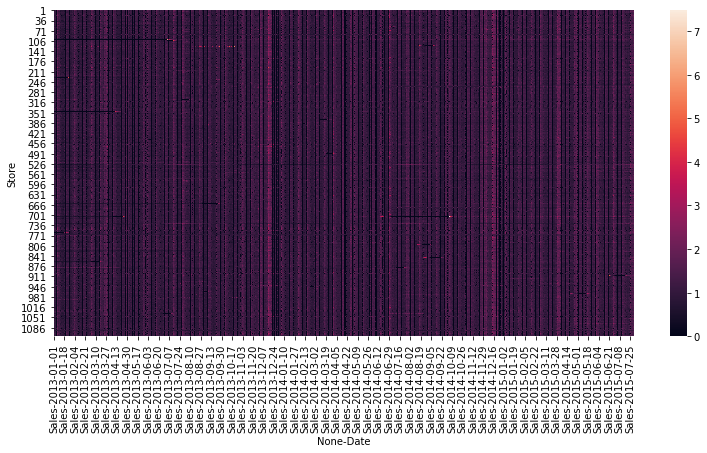

In [37]:
# generate a heatmap for it 
fig, ax = plt.subplots(figsize=(13,6))
sns.heatmap(data=x_norm, ax=ax)

# Pivoting

In [38]:
import pandas as pd
import numpy as np
dfo = pd.read_csv(r'C:\Users\muham\Downloads\pres16results.csv')
dfo.head()

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [39]:
top = dfo.loc[dfo.fips == 'US', ['cand', 'votes']].sort_values('votes', ascending=False)
top.head()

,cand,votes
1,Hillary Clinton,60981118.0
0,Donald Trump,60350241.0
2,Gary Johnson,4164589.0
3,Jill Stein,1255968.0
4,Evan McMullin,451636.0


In [40]:
candidates = top.cand.head()
candidates 

1    Hillary Clinton
0       Donald Trump
2       Gary Johnson
3         Jill Stein
4      Evan McMullin
Name: cand, dtype: object

In [41]:
df = dfo[dfo.cand.isin(candidates)]
df.head()

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [42]:
# PIVOT
p = df.pivot(index='fips', columns='cand', values='votes')
p

cand,Donald Trump,Evan McMullin,Gary Johnson,Hillary Clinton,Jill Stein
fips,,,,,
10001,36989.0,NaN,2876.0,33347.0,1041.0
10003,85507.0,NaN,9101.0,162905.0,3955.0
10005,62607.0,NaN,2774.0,39329.0,1104.0
1001,18110.0,NaN,538.0,5908.0,105.0
1003,72780.0,NaN,2448.0,18409.0,453.0
...,...,...,...,...,...
VT,95053.0,NaN,10047.0,178179.0,6748.0
WA,1043648.0,NaN,131779.0,1523720.0,46016.0
WI,1409467.0,NaN,106442.0,1382210.0,30980.0


In [43]:
# PIVOT TABLE 
# DONE in Jupyter Notebooks


In [44]:
df.pivot_table(index="county", values="votes", aggfunc=[np.mean, np.median, np.std])

,mean,median,std
,votes,votes,votes
county,,,
Abbeville County,2134.800000,128.0,3019.415043
Acadia Parish,5451.600000,281.0,9096.514239
Accomack County,3151.000000,262.0,4167.700805
Ada County,38748.000000,11204.0,42554.139094
Adair County,1677.294118,426.0,2215.892872
...,...,...,...
Yuba County,3703.750000,2860.5,4097.527334
Yuma County,5041.888889,701.0,8276.178805


In [45]:
df.pivot_table(index='county', columns='cand')

pct                                             \
cand             Donald Trump Evan McMullin Gary Johnson Hillary Clinton   
county                                                                     
Abbeville County     0.628683      0.005222     0.011936        0.346140   
Acadia Parish        0.772621      0.002702     0.010261        0.205872   
Accomack County      0.544716      0.007109     0.016630        0.427610   
Ada County           0.479316      0.057284     0.051016        0.386917   
Adair County         0.697080      0.006919     0.036282        0.254439   
...                       ...           ...          ...             ...   
Yuba County          0.594079           NaN     0.040592        0.342622   
Yuma County          0.655085      0.007075     0.029276        0.300082   
Zapata County        0.328015           NaN     0.010849        0.656031   
Zavala County        0.204130           NaN     0.014454        0.776696   
Ziebach County       0.480418           NaN     0.036554        0.459530   

                              pct_report                             \
cand             Jill Stein Donald Trump Evan McMullin Gary Johnson   
county                                                                
Abbeville County   0.003357          1.0           1.0          1.0   
Acadia Parish      0.003871          1.0           1.0          1.0   
Accomack County    0.003935          1.0           1.0          1.0   
Ada County         0.016024          1.0           1.0          1.0   
Adair County       0.007404          1.0           1.0          1.0   
...                     ...          ...           ...          ...   
Yuba County        0.015071          1.0           NaN          1.0   
Yuma County        0.007088          1.0           1.0          1.0   
Zapata County      0.005105          1.0           NaN          1.0   
Zavala County      0.004720          1.0           NaN          1.0   
Ziebach County          NaN          1.0           NaN          1.0   

                                             total_votes                \
cand             Hillary Clinton Jill Stein Donald Trump Evan McMullin   
county                                                                   
Abbeville County             1.0        1.0     10724.00       10724.0   
Acadia Parish                1.0        1.0     27386.00       27386.0   
Accomack County              1.0        1.0     15755.00       15755.0   
Ada County                   1.0        1.0    195587.00      195587.0   
Adair County                 1.0        1.0      7148.75        5995.0   
...                          ...        ...          ...           ...   
Yuba County                  1.0        1.0     14929.00           NaN   
Yuma County                  1.0        1.0     22711.50        4664.0   
Zapata County                1.0        1.0      3134.00           NaN   
Zavala County                1.0        1.0      3390.00           NaN   
Ziebach County               1.0        NaN       766.00           NaN   

                                                                    votes  \
cand             Gary Johnson Hillary Clinton     Jill Stein Donald Trump   
county                                                                      
Abbeville County     10724.00        10724.00   10724.000000      6742.00   
Acadia Parish        27386.00        27386.00   27386.000000     21159.00   
Accomack County      15755.00        15755.00   15755.000000      8582.00   
Ada County          195587.00       195587.00  195587.000000     93748.00   
Adair County          7148.75         7148.75    7375.666667      4966.25   
...                       ...             ...            ...          ...   
Yuba County          14929.00        14929.00   14929.000000      8869.00   
Yuma County          22711.50        22711.50   22711.500000     12170.50   
Zapata County         3134.00         3134.00    3134.000000      1028.00   
Zaval

In [46]:
df.pivot_table(index='county', columns='cand').swaplevel(0,1, axis=1).sort_index(axis=1,level=0)

cand             Donald Trump                                  Evan McMullin  \
                          pct pct_report total_votes     votes           pct   
county                                                                         
Abbeville County     0.628683        1.0    10724.00   6742.00      0.005222   
Acadia Parish        0.772621        1.0    27386.00  21159.00      0.002702   
Accomack County      0.544716        1.0    15755.00   8582.00      0.007109   
Ada County           0.479316        1.0   195587.00  93748.00      0.057284   
Adair County         0.697080        1.0     7148.75   4966.25      0.006919   
...                       ...        ...         ...       ...           ...   
Yuba County          0.594079        1.0    14929.00   8869.00           NaN   
Yuma County          0.655085        1.0    22711.50  12170.50      0.007075   
Zapata County        0.328015        1.0     3134.00   1028.00           NaN   
Zavala County        0.204130        1.0     3390.00    692.00           NaN   
Ziebach County       0.480418        1.0      766.00    368.00           NaN   

cand                                             Gary Johnson             \
                 pct_report total_votes    votes          pct pct_report   
county                                                                     
Abbeville County        1.0     10724.0     56.0     0.011936        1.0   
Acadia Parish           1.0     27386.0     74.0     0.010261        1.0   
Accomack County         1.0     15755.0    112.0     0.016630        1.0   
Ada County              1.0    195587.0  11204.0     0.051016        1.0   
Adair County            1.0      5995.0     51.0     0.036282        1.0   
...                     ...         ...      ...          ...        ...   
Yuba County             NaN         NaN      NaN     0.040592        1.0   
Yuma County             1.0      4664.0     33.0     0.029276        1.0   
Zapata County           NaN         NaN      NaN     0.010849        1.0   
Zavala County           NaN         NaN      NaN     0.014454        1.0   
Ziebach County          NaN         NaN      NaN     0.036554        1.0   

cand                                  Hillary Clinton                         \
                 total_votes    votes             pct pct_report total_votes   
county                                                                         
Abbeville County    10724.00   128.00        0.346140        1.0    10724.00   
Acadia Parish       27386.00   281.00        0.205872        1.0    27386.00   
Accomack County     15755.00   262.00        0.427610        1.0    15755.00   
Ada County         195587.00  9978.00        0.386917        1.0   195587.00   
Adair County         7148.75   258.25        0.254439        1.0     7148.75   
...                      ...      ...             ...        ...         ...   
Yuba County         14929.00   606.00        0.342622        1.0    14929.00   
Yuma County         22711.50   756.00        0.300082        1.0    22711.50   
Zapata County        3134.00    34.00        0.656031        1.0     3134.00   
Zavala County        3390.00    49.00        0.776696        1.0     3390.00   
Ziebach County        766.00    28.00        0.459530        1.0      766.00   

cand                       Jill Stein                                    
                     votes        pct pct_report    total_votes   votes  
county                                                                   
Abbeville County   3712.00   0.003357        1.0   10724.000000    36.0  
Acadia Parish      5638.00   0.003871        1.0   27386.000000   106.0  
Accomack County    6737.00   0.003935        1.0   15755.000000    62.0  
Ada County        75676.00   0.016024        1.0  195587.000000  3134.0  
Adair County       1829.75   0.007404        1.0    7375.666667    65.0  
...                    ...        ...        ...            ...     ...  
Yuba County        5115.00 

In [47]:
# Pivoting Margins
import pandas as pd 
import numpy as np
df = pd.read_csv(r'C:\Users\muham\Downloads\2015.csv')

In [48]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [49]:
# creating a total column 
df.pivot_table(index='Country', columns='Family', values='Happiness Score', margins=True)

Family,0.0,0.13995,0.30285,0.35386,0.38174,0.38561999999999996,0.41134,0.41411000000000003,0.41586999999999996,0.43106000000000005,...,1.31826,1.3196700000000001,1.32261,1.33095,1.34043,1.34951,1.36058,1.36948,1.4022299999999999,All
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,3.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.575000
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.959000
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.605000
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.033000
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.574000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.360000
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.077000
Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.129000


In [50]:
# creating a total column and naming it 
df.pivot_table(index='Country', columns='Family', values='Happiness Score', margins=True,
              aggfunc=np.sum, margins_name = 'SUMofAll')

Family,0.0,0.13995,0.30285,0.35386,0.38174,0.38561999999999996,0.41134,0.41411000000000003,0.41586999999999996,0.43106000000000005,...,1.31826,1.3196700000000001,1.32261,1.33095,1.34043,1.34951,1.36058,1.36948,1.4022299999999999,SUMofAll
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,3.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.575
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.959
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.605
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.033
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.360
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.077
Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.129


In [51]:
# show values with their mean
res = df.pivot_table(index='Country', values=['Economy (GDP per Capita)', 'Family'], margins=True,
                aggfunc=[np.mean, lambda x: np.mean(np.diff(x))])

C:\Users\muham\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\muham\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [52]:
# show values with their mean and median
df.pivot_table(index='Country', values=['Economy (GDP per Capita)', 'Family'], margins=True,
                aggfunc=[np.mean, np.median])

mean                             median  \
            Economy (GDP per Capita)    Family Economy (GDP per Capita)   
Country                                                                   
Afghanistan                 0.319820  0.302850                 0.319820   
Albania                     0.878670  0.804340                 0.878670   
Algeria                     0.939290  1.077720                 0.939290   
Angola                      0.757780  0.860400                 0.757780   
Argentina                   1.053510  1.248230                 1.053510   
...                              ...       ...                      ...   
Vietnam                     0.632160  0.912260                 0.632160   
Yemen                       0.546490  0.680930                 0.546490   
Zambia                      0.470380  0.916120                 0.470380   
Zimbabwe                    0.271000  1.032760                 0.271000   
All                         0.846137  0.991046                 0.910245   

                      
              Family  
Country               
Afghanistan  0.30285  
Albania      0.80434  
Algeria      1.07772  
Angola       0.86040  
Argentina    1.24823  
...              ...  
Vietnam      0.91226  
Yemen        0.68093  
Zambia       0.91612  
Zimbabwe     1.03276  
All          1.02951  

[159 rows x 4 columns]

In [53]:
#  compare measurement
res.columns = res.columns.set_levels(['mean_score', 'avg_improvement'], level=0)
res

mean_score                    avg_improvement  \
            Economy (GDP per Capita)    Family Economy (GDP per Capita)   
Afghanistan                 0.319820  0.302850                      NaN   
Albania                     0.878670  0.804340                      NaN   
Algeria                     0.939290  1.077720                      NaN   
Angola                      0.757780  0.860400                      NaN   
Argentina                   1.053510  1.248230                      NaN   
...                              ...       ...                      ...   
Vietnam                     0.632160  0.912260                      NaN   
Yemen                       0.546490  0.680930                      NaN   
Zambia                      0.470380  0.916120                      NaN   
Zimbabwe                    0.271000  1.032760                      NaN   
All                         0.846137  0.991046                -0.007566   

                       
               Family  
Afghanistan       NaN  
Albania           NaN  
Algeria           NaN  
Angola            NaN  
Argentina         NaN  
...               ...  
Vietnam           NaN  
Yemen             NaN  
Zambia            NaN  
Zimbabwe          NaN  
All         -0.007704  

[159 rows x 4 columns]

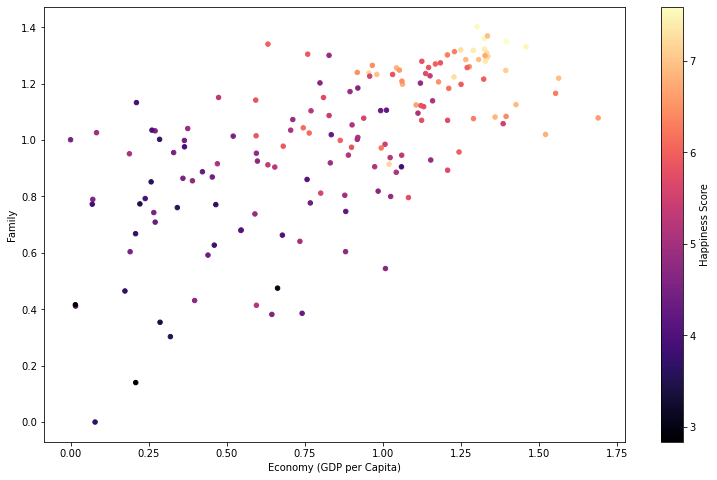

In [54]:
from matplotlib import pyplot as plt
# create a cmap for analysis of subplot
fig, axes = plt.subplots(figsize=(13,8))
df.plot.scatter(('Economy (GDP per Capita)'), ('Family'),
c=('Happiness Score'), cmap='magma', ax=axes);

In [55]:
# Post Processing Data 
# Quantile Cuts = qcut

labels = [f"{i +1} stars" for i in range(5)]
star = pd.qcut(res['mean_score', 'Family'], 5, labels=labels)
star.value_counts()

5 stars    32
4 stars    32
2 stars    32
1 stars    32
3 stars    31
Name: (mean_score, Family), dtype: int64

In [56]:
# benchmarks
res['TrivialisingHappiness'] = star
res

mean_score                    avg_improvement  \
            Economy (GDP per Capita)    Family Economy (GDP per Capita)   
Afghanistan                 0.319820  0.302850                      NaN   
Albania                     0.878670  0.804340                      NaN   
Algeria                     0.939290  1.077720                      NaN   
Angola                      0.757780  0.860400                      NaN   
Argentina                   1.053510  1.248230                      NaN   
...                              ...       ...                      ...   
Vietnam                     0.632160  0.912260                      NaN   
Yemen                       0.546490  0.680930                      NaN   
Zambia                      0.470380  0.916120                      NaN   
Zimbabwe                    0.271000  1.032760                      NaN   
All                         0.846137  0.991046                -0.007566   

                      TrivialisingHappiness  
               Family                        
Afghanistan       NaN               1 stars  
Albania           NaN               2 stars  
Algeria           NaN               3 stars  
Angola            NaN               2 stars  
Argentina         NaN               5 stars  
...               ...                   ...  
Vietnam           NaN               2 stars  
Yemen             NaN               1 stars  
Zambia            NaN               2 stars  
Zimbabwe          NaN               3 stars  
All         -0.007704               3 stars  

[159 rows x 5 columns]

# Cross Tab and Melting

In [57]:
import pandas as pd 
import numpy as np

df = pd.read_csv(r'C:\Users\muham\Downloads\heroes_information.csv')
df.drop(columns=df.columns[0], inplace=True)
df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


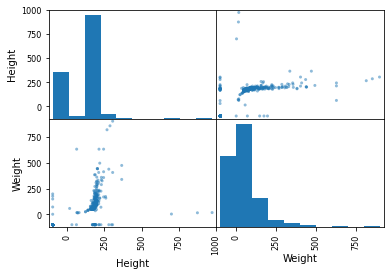

In [58]:
pd.plotting.scatter_matrix(df);

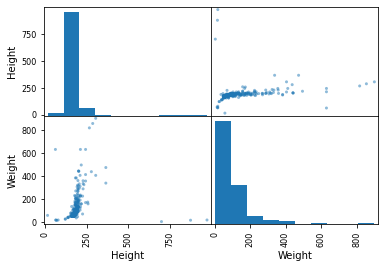

In [59]:
# with replacing values
df = df.replace(-99,np.NaN)
pd.plotting.scatter_matrix(df);

In [60]:
# cross tab
pd.crosstab(index=df['Skin color'], columns=df['Eye color'])

Eye color,-,amber,black,blue,blue / white,bown,brown,gold,green,green / blue,...,purple,red,silver,violet,white,white / red,yellow,yellow (without irises),yellow / blue,yellow / red
Skin color,,,,,,,,,,,,,,,,,,,,,
-,167,2,18,212,1,1,125,2,63,1,...,2,28,1,2,9,1,13,1,1,0
black,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
blue,0,0,1,5,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
blue-white,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
gold,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
gray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
green,1,0,1,2,0,0,1,0,7,0,...,1,7,0,0,0,0,1,0,0,0
grey,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
orange,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.pivot_table(index='Skin color', columns='Eye color', values='Alignment',
              aggfunc='count', dropna=False, fill_value=0)

Eye color,-,amber,black,blue,blue / white,bown,brown,gold,green,green / blue,...,purple,red,silver,violet,white,white / red,yellow,yellow (without irises),yellow / blue,yellow / red
Skin color,,,,,,,,,,,,,,,,,,,,,
-,167,2,18,212,1,1,125,2,63,1,...,2,28,1,2,9,1,13,1,1,0
black,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
blue,0,0,1,5,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
blue-white,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
gold,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
gray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
green,1,0,1,2,0,0,1,0,7,0,...,1,7,0,0,0,0,1,0,0,0
grey,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
orange,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Melting

In [62]:
# Unwrapped a 2D dataframe like that
res = df.pivot_table(index='Gender', columns='Alignment', values='Height',
                    aggfunc='count', margins=True, fill_value=0)
res

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,0,3,12,0,15
Female,0,25,117,2,144
Male,5,120,218,15,358
All,5,148,347,17,517


In [63]:
res.melt()

,Alignment,value
0,-,0
1,-,0
2,-,5
3,-,5
4,bad,3
5,bad,25
6,bad,120
7,bad,148
8,good,12
9,good,117


In [64]:
res.reset_index()

Alignment,Gender,-,bad,good,neutral,All
0,-,0,3,12,0,15
1,Female,0,25,117,2,144
2,Male,5,120,218,15,358
3,All,5,148,347,17,517


In [65]:
res.reset_index().melt()

,Alignment,value
0,Gender,-
1,Gender,Female
2,Gender,Male
3,Gender,All
4,-,0
5,-,0
6,-,5
7,-,5
8,bad,3
9,bad,25


In [66]:
# choose what you wanna melt
work = res.reset_index().melt(id_vars='Gender', value_name='Count')
work

,Gender,Alignment,Count
0,-,-,0
1,Female,-,0
2,Male,-,5
3,All,-,5
4,-,bad,3
5,Female,bad,25
6,Male,bad,120
7,All,bad,148
8,-,good,12
9,Female,good,117


In [67]:
work.pivot_table(index='Gender', columns='Alignment', values='Count')

Alignment,-,All,bad,good,neutral
Gender,,,,,
-,0,15,3,12,0
All,5,517,148,347,17
Female,0,144,25,117,2
Male,5,358,120,218,15


In [68]:
work.set_index(['Gender', 'Alignment']).Count

Gender  Alignment
-       -              0
Female  -              0
Male    -              5
All     -              5
-       bad            3
Female  bad           25
Male    bad          120
All     bad          148
-       good          12
Female  good         117
Male    good         218
All     good         347
-       neutral        0
Female  neutral        2
Male    neutral       15
All     neutral       17
-       All           15
Female  All          144
Male    All          358
All     All          517
Name: Count, dtype: int64

In [69]:
work.set_index(['Gender', 'Alignment']).Count.unstack()

Alignment,-,All,bad,good,neutral
Gender,,,,,
-,0,15,3,12,0
All,5,517,148,347,17
Female,0,144,25,117,2
Male,5,358,120,218,15


In [70]:
res.stack().to_frame('Count').reset_index()

,Gender,Alignment,Count
0,-,-,0
1,-,bad,3
2,-,good,12
3,-,neutral,0
4,-,All,15
5,Female,-,0
6,Female,bad,25
7,Female,good,117
8,Female,neutral,2
9,Female,All,144


# Introduction to DateTime Index

In [71]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\muham\Downloads\all_stocks_5yr.csv', parse_dates=['date'])
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [72]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [73]:
df2 = df.set_index(['Name', 'date']).sort_index()
df2.head()

open   high    low  close   volume
Name date                                           
A    2013-02-08  45.07  45.35  45.00  45.08  1824755
     2013-02-11  45.17  45.18  44.45  44.60  2915405
     2013-02-12  44.81  44.95  44.50  44.62  2373731
     2013-02-13  44.81  45.24  44.68  44.75  2052338
     2013-02-14  44.72  44.78  44.36  44.58  3826245

In [74]:
df2.loc['AAL']

,open,high,low,close,volume
date,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
2013-02-13,14.30,14.94,14.25,14.66,10259500
2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078
2018-02-02,53.49,53.99,52.03,52.10,5109361
2018-02-05,51.99,52.39,49.75,49.76,6878284


In [75]:
aal = df2.xs('AAL')
aal

,open,high,low,close,volume
date,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
2013-02-13,14.30,14.94,14.25,14.66,10259500
2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078
2018-02-02,53.49,53.99,52.03,52.10,5109361
2018-02-05,51.99,52.39,49.75,49.76,6878284


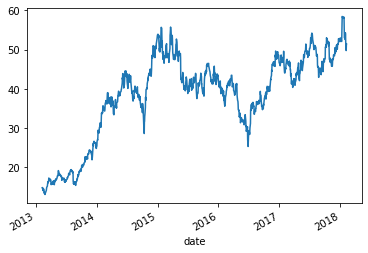

In [76]:
# generate a plot
aal.close.plot();

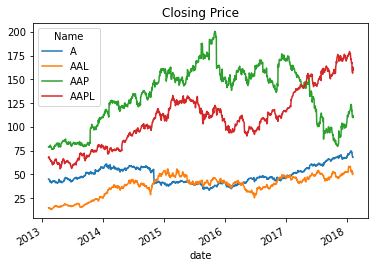

In [77]:
# SLice
idx = pd.IndexSlice
df_a = df2.loc[idx['A':'AB', :], :]
df_a.close.unstack(level='Name').plot(title='Closing Price');

In [78]:
# Slicing Datetimes 
aal['2017']

,open,high,low,close,volume
date,,,,,
2017-01-03,47.28,47.340,46.135,46.30,6737752
2017-01-04,46.63,47.435,46.350,46.70,5859604
2017-01-05,46.52,46.930,45.610,45.89,6825316
2017-01-06,45.85,46.720,45.470,46.21,7260197
2017-01-09,46.01,47.340,45.780,47.08,4739142
...,...,...,...,...,...
2017-12-22,52.72,52.880,52.420,52.59,2425104
2017-12-26,52.35,53.215,52.330,52.85,2774316
2017-12-27,52.80,52.880,52.060,52.40,2831434


In [79]:
aal['2017-01']

,open,high,low,close,volume
date,,,,,
2017-01-03,47.2800,47.340,46.135,46.30,6737752
2017-01-04,46.6300,47.435,46.350,46.70,5859604
2017-01-05,46.5200,46.930,45.610,45.89,6825316
2017-01-06,45.8500,46.720,45.470,46.21,7260197
2017-01-09,46.0100,47.340,45.780,47.08,4739142
2017-01-10,47.0000,48.510,46.970,48.48,7483764
2017-01-11,49.2900,49.900,48.100,48.64,6925770
2017-01-12,48.6700,49.000,46.840,48.10,5448098
2017-01-13,48.1600,48.430,47.540,47.65,3541980


In [80]:
aal.loc['2017-01-03']

open           47.280
high           47.340
low            46.135
close          46.300
volume    6737752.000
Name: 2017-01-03 00:00:00, dtype: float64

In [81]:
aal[idx['2017':'2018']]

,open,high,low,close,volume
date,,,,,
2017-01-03,47.28,47.340,46.135,46.30,6737752
2017-01-04,46.63,47.435,46.350,46.70,5859604
2017-01-05,46.52,46.930,45.610,45.89,6825316
2017-01-06,45.85,46.720,45.470,46.21,7260197
2017-01-09,46.01,47.340,45.780,47.08,4739142
...,...,...,...,...,...
2018-02-01,54.00,54.640,53.590,53.88,3623078
2018-02-02,53.49,53.990,52.030,52.10,5109361
2018-02-05,51.99,52.390,49.750,49.76,6878284


In [82]:
aal[idx['2017-01':'2018-02']]

,open,high,low,close,volume
date,,,,,
2017-01-03,47.28,47.340,46.135,46.30,6737752
2017-01-04,46.63,47.435,46.350,46.70,5859604
2017-01-05,46.52,46.930,45.610,45.89,6825316
2017-01-06,45.85,46.720,45.470,46.21,7260197
2017-01-09,46.01,47.340,45.780,47.08,4739142
...,...,...,...,...,...
2018-02-01,54.00,54.640,53.590,53.88,3623078
2018-02-02,53.49,53.990,52.030,52.10,5109361
2018-02-05,51.99,52.390,49.750,49.76,6878284


In [83]:
df2.loc[idx[:, '2017': '2017-01-05'], :]

open     high       low   close   volume
Name date                                                  
A    2017-01-03   45.93   46.750   45.7400   46.49  1739726
     2017-01-04   46.93   47.380   46.8162   47.10  1821264
AAL  2017-01-03   47.28   47.340   46.1350   46.30  6737752
     2017-01-04   46.63   47.435   46.3500   46.70  5859604
AAP  2017-01-03  170.78  171.360  169.3100  170.60   691526
...                 ...      ...       ...     ...      ...
ZBH  2017-01-04  103.88  105.345  103.3800  104.28  1502751
ZION 2017-01-03   43.74   44.330   42.7200   43.18  2896301
     2017-01-04   43.45   43.910   43.3500   43.80  1907508
ZTS  2017-01-03   53.88   54.380   53.3350   53.59  3580369
     2017-01-04   53.72   54.180   53.1000   54.11  3316309

[999 rows x 5 columns]

In [84]:
start, end= aal.index.min(), aal.index.max()
print(start, end)

2013-02-08 00:00:00 2018-02-07 00:00:00


In [85]:
new_index = pd.date_range(start, end)
new_index

DatetimeIndex(['2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11',
               '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15',
               '2013-02-16', '2013-02-17',
               ...
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', length=1826, freq='D')

In [86]:
# code needs revision
#start, end = df.index.levels[1], df.index[1]
#print(start, end)

In [87]:
 # n_index = pd.MultiIndex.from_product([df.index.level[0], new_index])
# df.reindex(index=n_index, method='ffill')

In [88]:
# filled = df.unstack('Name').reindex(new_index, method='ffill', tolerance=pd.Timedelta('2 days'))
# filled = filled.stack('Name').swaplevel().sort_level()
# filled

# Time Series Resampling, Re-indexing and rollout are the same as groupby and dont require being used that much anymore 

In [89]:
# time Zones
import pandas as pd
%matplotlib inline

df = pd.read_csv(r'C:\Users\muham\Downloads\data_elonmusk.csv')
df = df.drop(df.columns[0], axis=1)
df

,Tweet,Time,Retweet from,User
0,@MeltingIce Assuming max acceleration of 2 to ...,9/29/2017 17:39,NaN,elonmusk
1,RT @SpaceX: BFR is capable of transporting sat...,9/29/2017 10:44,SpaceX,elonmusk
2,@bigajm Yup :),9/29/2017 10:39,NaN,elonmusk
3,Part 2 https://t.co/8Fvu57muhM,9/29/2017 9:56,NaN,elonmusk
4,Fly to most places on Earth in under 30 mins a...,9/29/2017 9:19,NaN,elonmusk
...,...,...,...,...
3217,RT @Jon_Favreau: My Model S just arrived and I...,11/16/2012 17:59,Jon_Favreau,elonmusk
3218,NaN,NaN,NaN,NaN
3219,NaN,NaN,NaN,NaN
3220,NaN,NaN,NaN,NaN


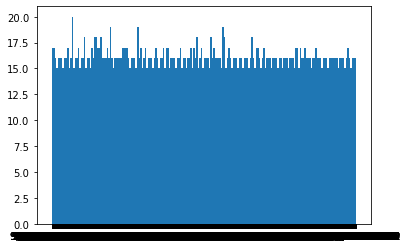

In [91]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df.Time.hist(bins=200, grid=False);

Converted to datetime in between using pd.to_datetime

In [108]:
#df['DateTime'] = pd.to_datetime(df['DateTime'])

In [109]:
#df['DateTime'] = df.DateTime.dt.time
#df

In [110]:
#df.DateTime.dt.hour.value_counts()

In [111]:
#df.Time.dt.hour.value_counts().sort_index().plot.bar();

In [112]:
#df.DateTime.dt.tz_convert(None).dt.tz.localize('America/Los_Angeles')
# this may not work like those abpve depending upon the computer system processing capacity 

In [116]:
# all timezones
import pytz
for t in pytz.all_timezones:
    print(t)

Africa/Abidjan
Africa/Accra
Africa/Addis_Ababa
Africa/Algiers
Africa/Asmara
Africa/Asmera
Africa/Bamako
Africa/Bangui
Africa/Banjul
Africa/Bissau
Africa/Blantyre
Africa/Brazzaville
Africa/Bujumbura
Africa/Cairo
Africa/Casablanca
Africa/Ceuta
Africa/Conakry
Africa/Dakar
Africa/Dar_es_Salaam
Africa/Djibouti
Africa/Douala
Africa/El_Aaiun
Africa/Freetown
Africa/Gaborone
Africa/Harare
Africa/Johannesburg
Africa/Juba
Africa/Kampala
Africa/Khartoum
Africa/Kigali
Africa/Kinshasa
Africa/Lagos
Africa/Libreville
Africa/Lome
Africa/Luanda
Africa/Lubumbashi
Africa/Lusaka
Africa/Malabo
Africa/Maputo
Africa/Maseru
Africa/Mbabane
Africa/Mogadishu
Africa/Monrovia
Africa/Nairobi
Africa/Ndjamena
Africa/Niamey
Africa/Nouakchott
Africa/Ouagadougou
Africa/Porto-Novo
Africa/Sao_Tome
Africa/Timbuktu
Africa/Tripoli
Africa/Tunis
Africa/Windhoek
America/Adak
America/Anchorage
America/Anguilla
America/Antigua
America/Araguaina
America/Argentina/Buenos_Aires
America/Argentina/Catamarca
America/Argentina/ComodRivad